In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [9]:
df

,Title,Is Series,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Lets Fight Ghost,1,4.3,1.0,7.9,98.0,82.0,74.0,57.0,2122065.0,...,0,0,0,0,1,0,0,0,0,0
1,HOW TO BUILD A GIRL,0,7.0,3.0,5.8,79.0,69.0,1.0,0.0,70632.0,...,0,0,0,0,0,0,0,0,0,0
2,Joker,0,3.5,3.0,8.4,68.0,59.0,112.0,228.0,335451311.0,...,0,0,0,0,0,0,0,1,0,0
3,I,0,2.8,3.0,6.5,52.0,51.0,26.0,69.0,474544677.0,...,0,0,0,0,0,1,0,0,0,0
4,Harrys Daughters,0,4.4,3.0,8.1,96.0,85.0,46.0,94.0,381409310.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,50 First Dates,0,2.7,3.0,6.8,45.0,48.0,6.0,10.0,120908074.0,...,0,0,0,0,1,0,0,0,0,0
2505,21,0,2.5,5.0,6.8,36.0,48.0,1.0,5.0,81159365.0,...,0,0,0,0,0,0,0,1,0,0
2506,One Chance,0,3.0,3.0,6.8,63.0,52.0,3.0,5.0,101196.0,...,1,0,0,0,0,0,0,0,0,0
2507,The Twilight Saga: Breaking Dawn: Part 1,0,2.0,5.0,4.9,25.0,45.0,11.0,22.0,281287133.0,...,0,0,0,0,1,0,0,1,0,0


In [10]:
df['Release Year'] = pd.to_datetime(df['Release Date'],unit='s').dt.year
df['Release Month'] = pd.to_datetime(df['Release Date'],unit='s').dt.month
df['Release Month']

0       3
1       3
2       3
3       3
4       3
       ..
2504    4
2505    4
2506    4
2507    4
2508    4
Name: Release Month, Length: 2509, dtype: int32

In [11]:
# Define age groups
def age_group(age):
    if age == 0:
        return 'All'
    elif 1 <= age <= 16:
        return 'Teen'
    else:
        return 'Adult'
df['Age Group'] = df['Minimum Age'].apply(age_group)

df['Age Group']

0       Adult
1       Adult
2       Adult
3        Teen
4        Teen
        ...  
2504     Teen
2505     Teen
2506     Teen
2507     Teen
2508     Teen
Name: Age Group, Length: 2509, dtype: object

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



# Create age groups
target = df['Age Group']


# Define the features and target variable
features = df.drop(columns=['Minimum Age', 'Age Group']).select_dtypes(include=[int, float])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.604


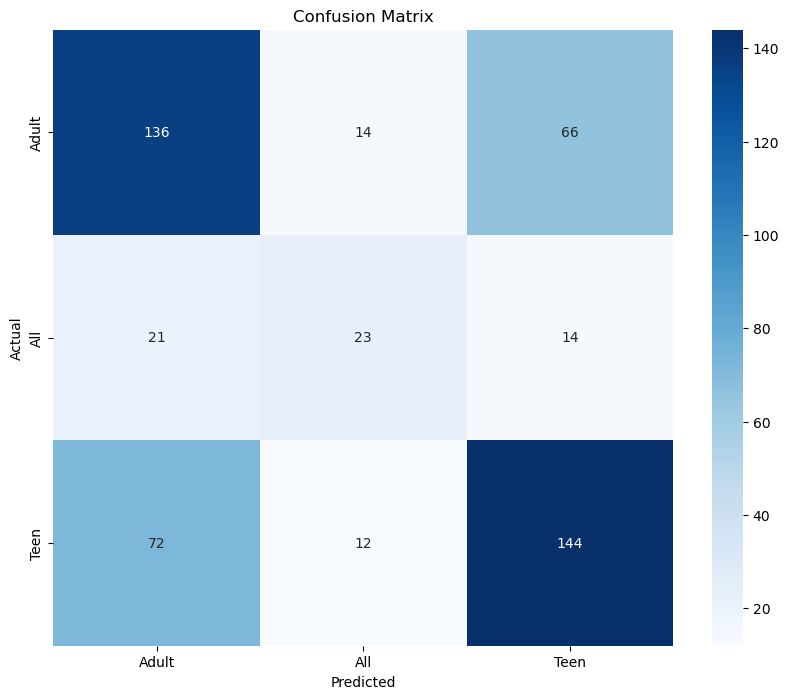

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap of confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adult', 'All', 'Teen'],
            yticklabels=['Adult', 'All', 'Teen'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

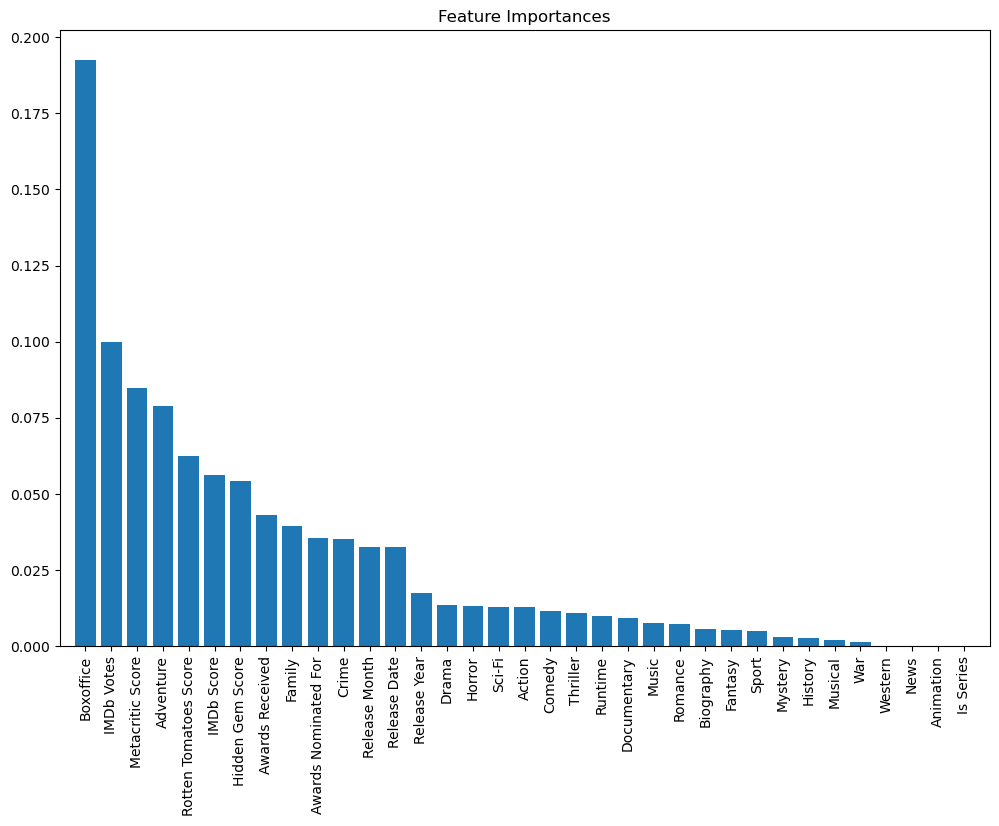

In [14]:
import numpy as np
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), [features.columns[i] for i in indices], rotation=90)
plt.xlim([-1, features.shape[1]])
plt.show()

In [15]:
# Define the threshold for low importance
threshold = 0.01

# Filter out features with importance below the threshold
important_features = features.columns[importances > threshold]

# Update the features dataframe to include only important features
features_important = features[important_features]

# Split the data into training and testing sets with important features
X_train_important, X_test_important, y_train, y_test = train_test_split(features_important, target, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf_important = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_important.fit(X_train_important, y_train)

# Make predictions
y_pred_important = clf_important.predict(X_test_important)

# Calculate the accuracy
accuracy_important = accuracy_score(y_test, y_pred_important)
print(f'Accuracy with important features: {accuracy_important:.3f}')

Accuracy with important features: 0.616


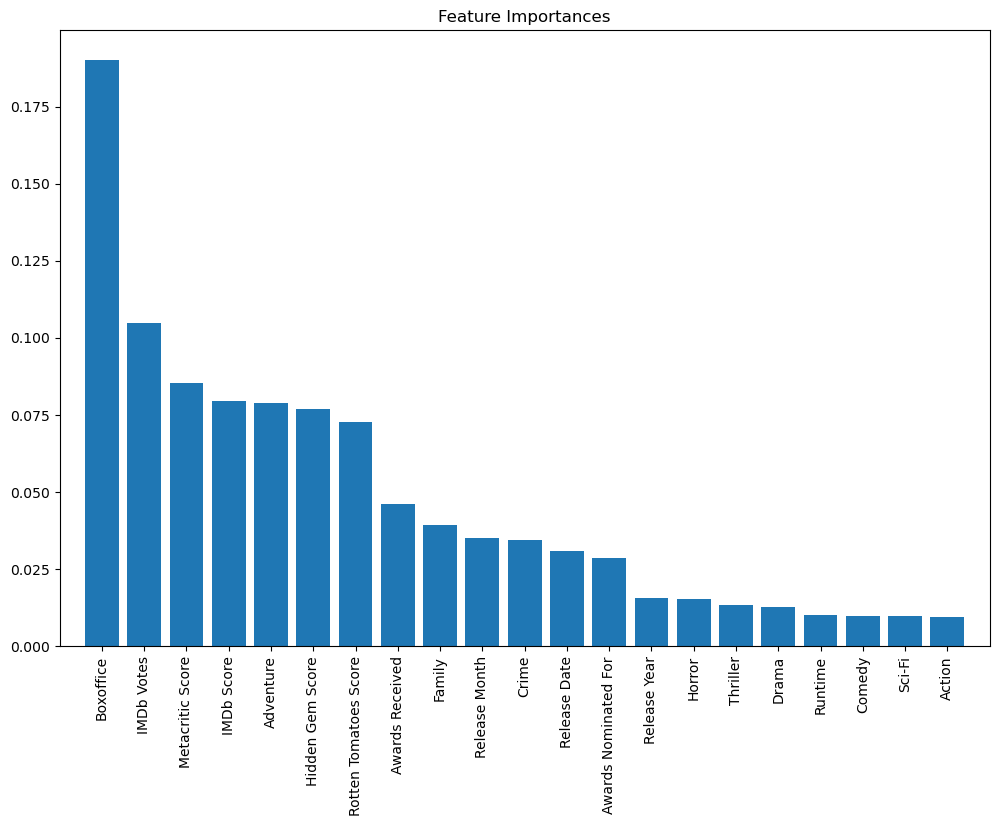

In [16]:
import matplotlib.pyplot as plt

importances = clf_important.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(features_important.shape[1]), importances[indices], align="center")
plt.xticks(range(features_important.shape[1]), [features_important.columns[i] for i in indices], rotation=90)
plt.xlim([-1, features_important.shape[1]])
plt.show()


n_iterations: 7
n_required_iterations: 8
n_possible_iterations: 7
min_resources_: 30
max_resources_: 2007
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 162
n_resources: 30
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 81
n_resources: 60
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 2
n_candidates: 41
n_resources: 120
Fitting 5 folds for each of 41 candidates, totalling 205 fits
----------
iter: 3
n_candidates: 21
n_resources: 240
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 4
n_candidates: 11
n_resources: 480
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 6
n_resources: 960
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 6
n_candidates: 3
n_resources: 1920
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth'

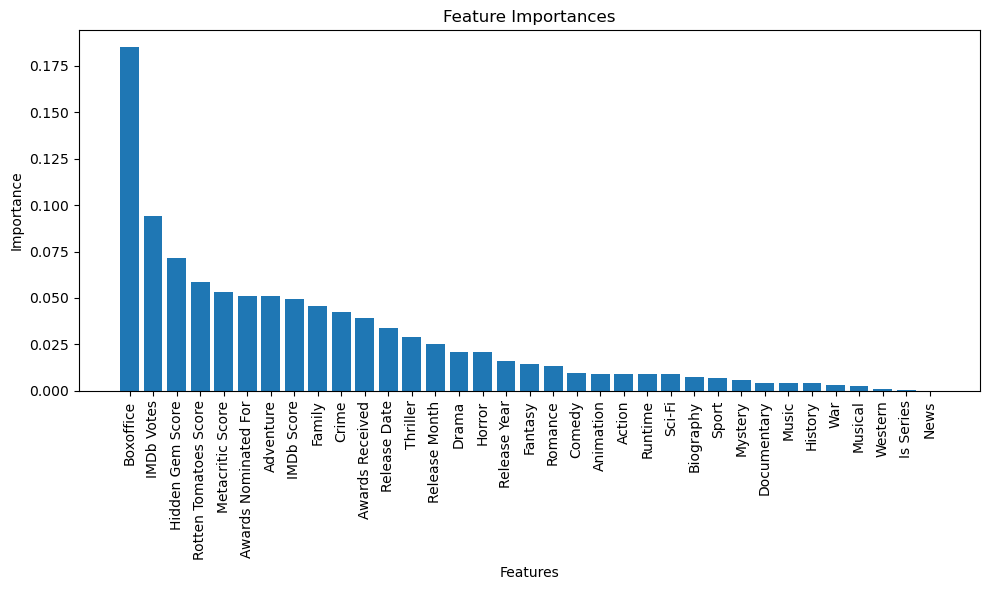

Features to remove: ['Comedy', 'Animation', 'Action', 'Runtime', 'Sci-Fi', 'Biography', 'Sport', 'Mystery', 'Documentary', 'Music', 'History', 'War', 'Musical', 'Western', 'Is Series', 'News']
n_iterations: 7
n_required_iterations: 8
n_possible_iterations: 7
min_resources_: 30
max_resources_: 2007
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 162
n_resources: 30
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 81
n_resources: 60
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 2
n_candidates: 41
n_resources: 120
Fitting 5 folds for each of 41 candidates, totalling 205 fits
----------
iter: 3
n_candidates: 21
n_resources: 240
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 4
n_candidates: 11
n_resources: 480
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 6
n_resources: 960
Fitting 5 folds for each of 6 candi

In [17]:
import pandas as pd
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load your data (replace 'your_data.csv' with the actual file path)

# Separate features (X) and target (y)
X = df.drop(columns=['Minimum Age', 'Age Group']).select_dtypes(include=[int, float])
y = df['Age Group']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test size as needed

# Define the parameter grid for HalvingGridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Explore different numbers of trees
    'max_depth': [None, 10, 20],      # Explore different tree depths
    'min_samples_split': [2, 5, 10],   # Explore different minimum samples to split
    'min_samples_leaf': [1, 2, 4],     # Explore different minimum samples per leaf
    'criterion': ['gini', 'entropy']  # Explore different splitting criteria
}

# Initialize HalvingGridSearchCV
halving_cv = HalvingGridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,           # Use all available cores
    verbose=1,           # Print progress updates
    factor=2,            # Reduce the number of candidates by half in each iteration
    resource='n_samples' # Using n_samples as the resource parameter
)


# Fit the model using HalvingGridSearchCV
halving_cv.fit(X_train, y_train)

# Get the best model from HalvingGridSearchCV
best_rf_model = halving_cv.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", halving_cv.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


# Feature Importance Analysis and Removal (Optional)
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

# Identify features with low importance (e.g., below a threshold)
low_importance_threshold = 0.01  # Adjust the threshold as needed
features_to_remove = feature_importance_df[feature_importance_df['Importance'] < low_importance_threshold]['Feature'].tolist()

print(f"Features to remove: {features_to_remove}")

# Remove low-importance features and retrain (optional)
if features_to_remove:
    X_train_reduced = X_train.drop(features_to_remove, axis=1)
    X_test_reduced = X_test.drop(features_to_remove, axis=1)


    halving_cv_reduced = HalvingGridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,                # 5-fold cross-validation
        scoring='accuracy',  # Optimize for accuracy
        n_jobs=-1,           # Use all available cores
        verbose=1,           # Print progress updates
        factor=2,            # Reduce the number of candidates by half in each iteration
        resource='n_samples' # Using n_samples as the resource parameter
    )

    halving_cv_reduced.fit(X_train_reduced, y_train)
    best_rf_model_reduced = halving_cv_reduced.best_estimator_
    y_pred_reduced = best_rf_model_reduced.predict(X_test_reduced)

    print("Reduced Model Best Hyperparameters:", halving_cv_reduced.best_params_)
    print("Reduced Model Classification Report:\n", classification_report(y_test, y_pred_reduced))
    print("Reduced Model Accuracy:", accuracy_score(y_test, y_pred_reduced))

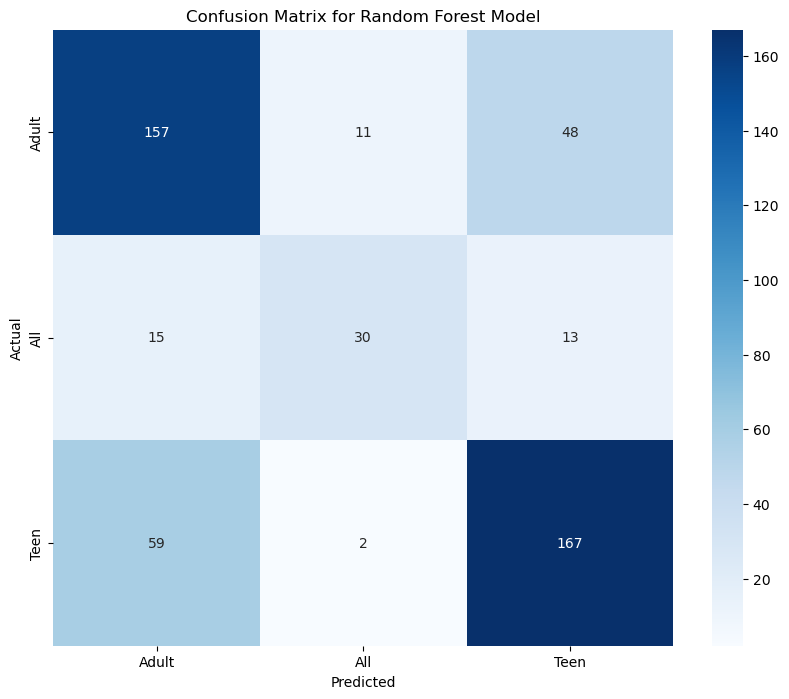

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Get predictions from best_rf_model

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap of confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Adult', 'All', 'Teen'],
            yticklabels=['Adult', 'All', 'Teen'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

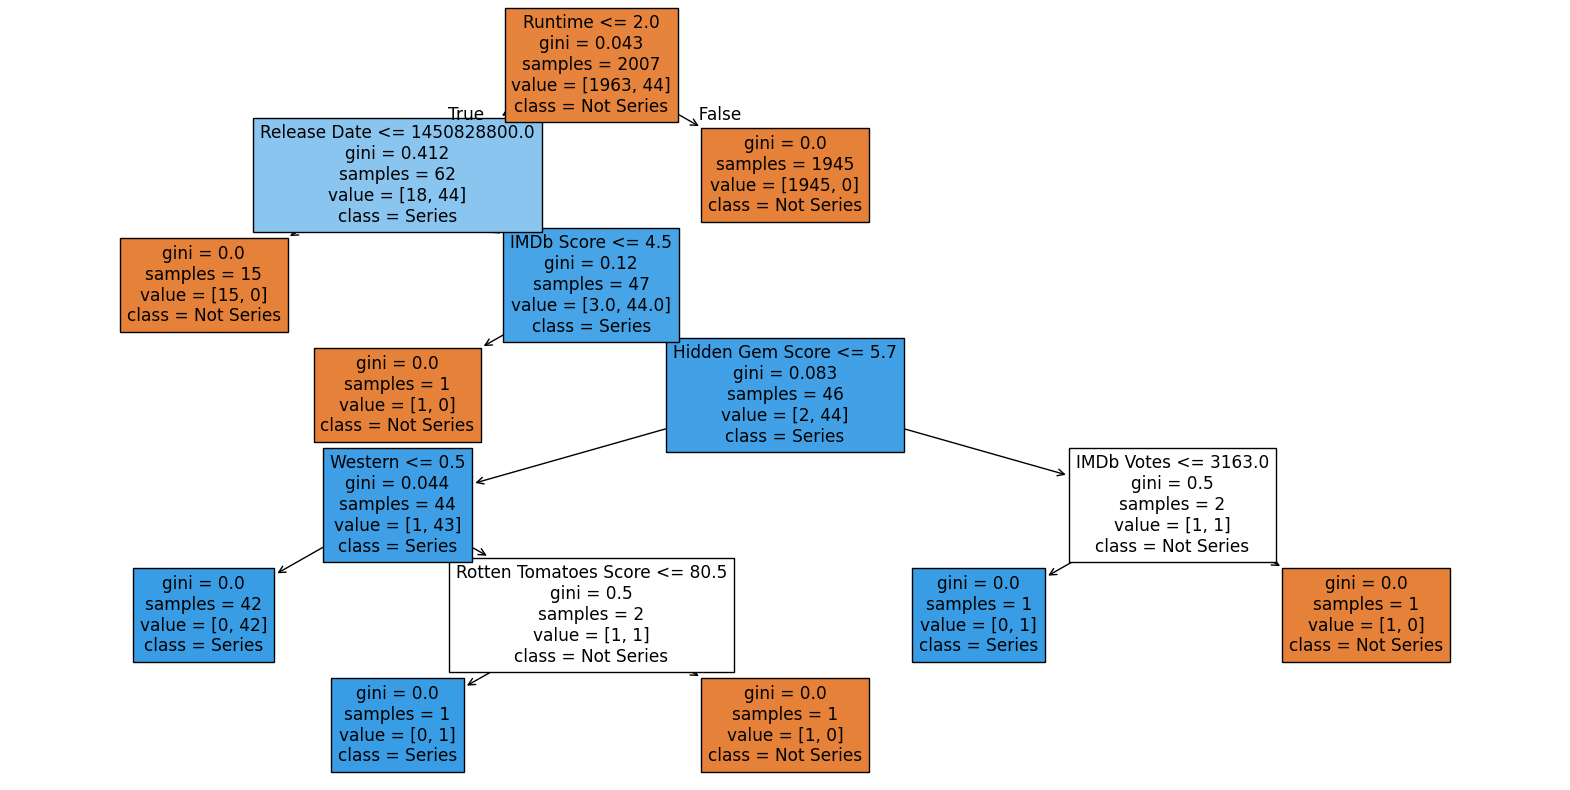

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the features and target variable for 'Is Series'
features_is_series = df.select_dtypes(include=[int, float]).drop(columns=['Is Series'])
target_is_series = df['Is Series']

# Split the data into training and testing sets
X_train_is_series, X_test_is_series, y_train_is_series, y_test_is_series = train_test_split(features_is_series, target_is_series, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf_is_series = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_is_series.fit(X_train_is_series, y_train_is_series)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_is_series, feature_names=features_is_series.columns, class_names=['Not Series', 'Series'], filled=True)
plt.show()

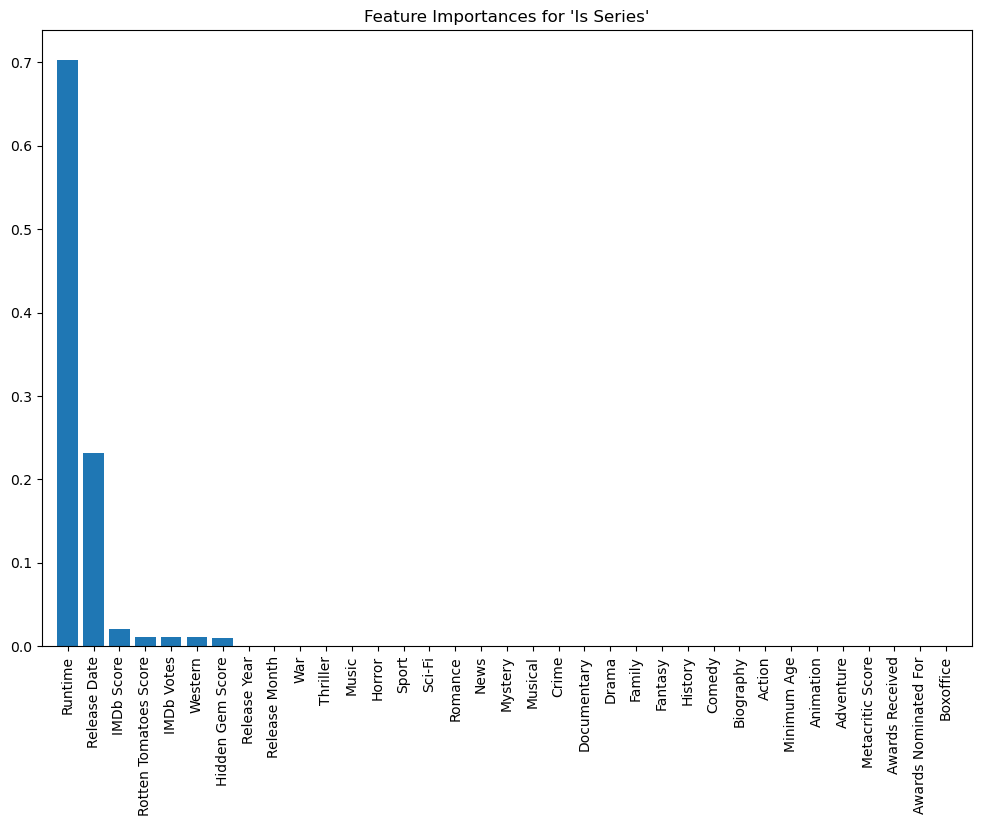

In [20]:
import matplotlib.pyplot as plt

importances = clf_is_series.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for 'Is Series'")
plt.bar(range(features_is_series.shape[1]), importances[indices], align="center")
plt.xticks(range(features_is_series.shape[1]), [features_is_series.columns[i] for i in indices], rotation=90)
plt.xlim([-1, features_is_series.shape[1]])
plt.show()


In [21]:
# Make predictions
y_pred_is_series = clf_is_series.predict(X_test_is_series)

# Calculate the accuracy
accuracy_is_series = accuracy_score(y_test_is_series, y_pred_is_series)
print(f'Accuracy: {accuracy_is_series:.2f}')

Accuracy: 1.00
